In [1]:
import pandas as pd
df = pd.read_parquet("project_sample_data.parquet")
#df["Duration"] = (df["ended_at"]-df["Start_date"]) / pd.Timedelta(minutes=1)
df.columns

Index(['ride_id', 'Bike_number', 'Duration', 'Start_date', 'End_date',
       'Start_station', 'Start_station_number', 'Start_capacity',
       'End_station', 'End_station_number', 'End_capacity', 'start_lat',
       'start_lon', 'end_lat', 'end_lon', 'Member_type', 'Temp',
       'Relative_humidity', 'Wind_speed', 'Year', 'Month', 'Weekday', 'Hour',
       'normalised_date', 'Season'],
      dtype='object')

In [2]:
df_red = df[df["Duration"].between(1,24*60)].dropna().sample(100000)
df_red.head(2)

ride_id Bike_number  Duration          Start_date  \
index                                                          
8143988    8143988      W20751       509 2014-09-16 08:21:06   
20857298  20857298      W20917       359 2018-06-26 17:05:45   

                    End_date   Start_station  Start_station_number  \
index                                                                
8143988  2014-09-16 08:29:35   3rd & H St NE                 31616   
20857298 2018-06-26 17:11:44  15th & M St NW                 31298   

          Start_capacity                    End_station  End_station_number  \
index                                                                         
8143988               19  5th St & Massachusetts Ave NW               31265   
20857298              19                 11th & M St NW               31266   

          ...  Member_type   Temp  Relative_humidity  Wind_speed  Year Month  \
index     ...                                                                  
8143988   ...       Member  20.53              52.94        5.36  2014     9   
20857298  ...       Member  24.08              65.19        4.92  2018     6   

          Weekday  Hour  normalised_date  Season  
index                                             
8143988         1     8       2014-09-16       4  
20857298        1    17       2018-06-26       3  

[2 rows x 25 columns]

In [3]:
import geopy.distance

def distance_calc (row):
    start = (row['start_lat'], row['start_lon'])
    stop = (row['end_lat'], row['end_lon'])

    return geopy.distance.geodesic(start, stop).kilometers
df_red['dist_air'] = df_red.apply (lambda df_red: distance_calc(df_red),axis=1)
df_red

ride_id Bike_number  Duration          Start_date  \
index                                                          
8143988    8143988      W20751       509 2014-09-16 08:21:06   
20857298  20857298      W20917       359 2018-06-26 17:05:45   
3762587    3762587      W01131       603 2013-03-10 12:31:58   
18722256  18722256      W22417       509 2017-10-24 18:01:13   
8899872    8899872      W20407       995 2014-12-17 17:48:12   
...            ...         ...       ...                 ...   
11310267  11310267      W21157        96 2015-09-19 12:32:25   
6419875    6419875      W00405       273 2014-03-27 08:17:31   
21687742  21687742      W00189       177 2018-08-28 17:43:47   
9788474    9788474      W21687       530 2015-05-08 17:32:19   
3797602    3797602      W00264      1029 2013-03-16 13:20:52   

                    End_date                   Start_station  \
index                                                          
8143988  2014-09-16 08:29:35                   3rd & H St NE   
20857298 2018-06-26 17:11:44                  15th & M St NW   
3762587  2013-03-10 12:42:02     New Hampshire Ave & T St NW   
18722256 2017-10-24 18:09:42             King St Metro South   
8899872  2014-12-17 18:04:47                  10th & K St NW   
...                      ...                             ...   
11310267 2015-09-19 12:34:02        Calvert & Biltmore St NW   
6419875  2014-03-27 08:22:05       1st & Rhode Island Ave NW   
21687742 2018-08-28 17:46:44  California St & Florida Ave NW   
9788474  2015-05-08 17:41:10       New York Ave & 15th St NW   
3797602  2013-03-16 13:38:01           Florida Ave & R St NW   

          Start_station_number  Start_capacity                    End_station  \
index                                                                           
8143988                  31616              19  5th St & Massachusetts Ave NW   
20857298                 31298              19                 11th & M St NW   
3762587                  31229              23     M St & Pennsylvania Ave NW   
18722256                 31048              23        Henry St & Pendleton St   
8899872                  31263              23       New Jersey Ave & R St NW   
...                        ...             ...                            ...   
11310267                 31106              23     Calvert St & Woodley Pl NW   
6419875                  31506              15                  7th & T St NW   
21687742                 31116              19    New Hampshire Ave & T St NW   
9788474                  31222              19                  Thomas Circle   
3797602                  31503              15                 14th & G St NW   

          End_station_number  ...   Temp  Relative_humidity  Wind_speed  Year  \
index                         ...                                               
8143988                31265  ...  20.53              52.94        5.36  2014   
20857298               31266  ...  24.08              65.19        4.92  2018   
3762587                31246  ...  13.48              46.44        4.75  2013   
18722256               31046  ...  16.40              67.56        3.03  2017   
8899872                31509  ...   4.04              74.38        4.92  2014   
...                      ...  ...    ...                ...         ...   ...   
11310267               31121  ...  29.73              40.00        4.02  2015   
6419875                31109  ...   0.58              53.06        2.48  2014   
21687742               31229  ...  30.80              67.00        2.69  2018   
9788474                31241  ...  23.32              70.25        3.26  2015   
3797602                31238  ...   8.98              79.94        3.82  2013   

          Month Weekday  Hour  normalised_date  Season  dist_air  
index                                                             
8143988       9       1     8       2014-09-16       4  1.452232  
20857298      6       1    17       

In [4]:
# Median der Koordinaten, unser definierter Referenzpunkt

#end_ref = df[["end_lat","end_lon"]].median().values
#geopy.distance.geodesic(start_ref, end_ref).meters
ref = df[["start_lat","start_lon"]].median().values

def get_direction(row):
    start = (row['start_lat'], row['start_lon'])
    stop = (row['end_lat'], row['end_lon'])
    return geopy.distance.geodesic(start, ref).kilometers > geopy.distance.geodesic(stop, ref).kilometers
df_red['inbound'] = df_red.apply (lambda df_red: get_direction(df_red),axis=1)
df_red

ride_id Bike_number  Duration          Start_date  \
index                                                          
8143988    8143988      W20751       509 2014-09-16 08:21:06   
20857298  20857298      W20917       359 2018-06-26 17:05:45   
3762587    3762587      W01131       603 2013-03-10 12:31:58   
18722256  18722256      W22417       509 2017-10-24 18:01:13   
8899872    8899872      W20407       995 2014-12-17 17:48:12   
...            ...         ...       ...                 ...   
11310267  11310267      W21157        96 2015-09-19 12:32:25   
6419875    6419875      W00405       273 2014-03-27 08:17:31   
21687742  21687742      W00189       177 2018-08-28 17:43:47   
9788474    9788474      W21687       530 2015-05-08 17:32:19   
3797602    3797602      W00264      1029 2013-03-16 13:20:52   

                    End_date                   Start_station  \
index                                                          
8143988  2014-09-16 08:29:35                   3rd & H St NE   
20857298 2018-06-26 17:11:44                  15th & M St NW   
3762587  2013-03-10 12:42:02     New Hampshire Ave & T St NW   
18722256 2017-10-24 18:09:42             King St Metro South   
8899872  2014-12-17 18:04:47                  10th & K St NW   
...                      ...                             ...   
11310267 2015-09-19 12:34:02        Calvert & Biltmore St NW   
6419875  2014-03-27 08:22:05       1st & Rhode Island Ave NW   
21687742 2018-08-28 17:46:44  California St & Florida Ave NW   
9788474  2015-05-08 17:41:10       New York Ave & 15th St NW   
3797602  2013-03-16 13:38:01           Florida Ave & R St NW   

          Start_station_number  Start_capacity                    End_station  \
index                                                                           
8143988                  31616              19  5th St & Massachusetts Ave NW   
20857298                 31298              19                 11th & M St NW   
3762587                  31229              23     M St & Pennsylvania Ave NW   
18722256                 31048              23        Henry St & Pendleton St   
8899872                  31263              23       New Jersey Ave & R St NW   
...                        ...             ...                            ...   
11310267                 31106              23     Calvert St & Woodley Pl NW   
6419875                  31506              15                  7th & T St NW   
21687742                 31116              19    New Hampshire Ave & T St NW   
9788474                  31222              19                  Thomas Circle   
3797602                  31503              15                 14th & G St NW   

          End_station_number  ...  Relative_humidity  Wind_speed  Year  Month  \
index                         ...                                               
8143988                31265  ...              52.94        5.36  2014      9   
20857298               31266  ...              65.19        4.92  2018      6   
3762587                31246  ...              46.44        4.75  2013      3   
18722256               31046  ...              67.56        3.03  2017     10   
8899872                31509  ...              74.38        4.92  2014     12   
...                      ...  ...                ...         ...   ...    ...   
11310267               31121  ...              40.00        4.02  2015      9   
6419875                31109  ...              53.06        2.48  2014      3   
21687742               31229  ...              67.00        2.69  2018      8   
9788474                31241  ...              70.25        3.26  2015      5   
3797602                31238  ...              79.94        3.82  2013      3   

          Weekday Hour  normalised_date  Season  dist_air  inbound  
index                                                               
8143988         1    8       2014-09-16       4  1.452232     True  
20857298        1   17       2

In [5]:
#df_red["Duration"] = (df_red["ended_at"]-df_red["Start_date"]) / pd.Timedelta(minutes=1)
df_red["kph"] = df_red["dist_air"]/df_red["Duration"]*60
df_red

ride_id Bike_number  Duration          Start_date  \
index                                                          
8143988    8143988      W20751       509 2014-09-16 08:21:06   
20857298  20857298      W20917       359 2018-06-26 17:05:45   
3762587    3762587      W01131       603 2013-03-10 12:31:58   
18722256  18722256      W22417       509 2017-10-24 18:01:13   
8899872    8899872      W20407       995 2014-12-17 17:48:12   
...            ...         ...       ...                 ...   
11310267  11310267      W21157        96 2015-09-19 12:32:25   
6419875    6419875      W00405       273 2014-03-27 08:17:31   
21687742  21687742      W00189       177 2018-08-28 17:43:47   
9788474    9788474      W21687       530 2015-05-08 17:32:19   
3797602    3797602      W00264      1029 2013-03-16 13:20:52   

                    End_date                   Start_station  \
index                                                          
8143988  2014-09-16 08:29:35                   3rd & H St NE   
20857298 2018-06-26 17:11:44                  15th & M St NW   
3762587  2013-03-10 12:42:02     New Hampshire Ave & T St NW   
18722256 2017-10-24 18:09:42             King St Metro South   
8899872  2014-12-17 18:04:47                  10th & K St NW   
...                      ...                             ...   
11310267 2015-09-19 12:34:02        Calvert & Biltmore St NW   
6419875  2014-03-27 08:22:05       1st & Rhode Island Ave NW   
21687742 2018-08-28 17:46:44  California St & Florida Ave NW   
9788474  2015-05-08 17:41:10       New York Ave & 15th St NW   
3797602  2013-03-16 13:38:01           Florida Ave & R St NW   

          Start_station_number  Start_capacity                    End_station  \
index                                                                           
8143988                  31616              19  5th St & Massachusetts Ave NW   
20857298                 31298              19                 11th & M St NW   
3762587                  31229              23     M St & Pennsylvania Ave NW   
18722256                 31048              23        Henry St & Pendleton St   
8899872                  31263              23       New Jersey Ave & R St NW   
...                        ...             ...                            ...   
11310267                 31106              23     Calvert St & Woodley Pl NW   
6419875                  31506              15                  7th & T St NW   
21687742                 31116              19    New Hampshire Ave & T St NW   
9788474                  31222              19                  Thomas Circle   
3797602                  31503              15                 14th & G St NW   

          End_station_number  ...  Wind_speed  Year  Month  Weekday  Hour  \
index                         ...                                           
8143988                31265  ...        5.36  2014      9        1     8   
20857298               31266  ...        4.92  2018      6        1    17   
3762587                31246  ...        4.75  2013      3        6    12   
18722256               31046  ...        3.03  2017     10        1    18   
8899872                31509  ...        4.92  2014     12        2    17   
...                      ...  ...         ...   ...    ...      ...   ...   
11310267               31121  ...        4.02  2015      9        5    12   
6419875                31109  ...        2.48  2014      3        3     8   
21687742               31229  ...        2.69  2018      8        1    17   
9788474                31241  ...        3.26  2015      5        4    17   
3797602                31238  ...        3.82  2013      3        5    13   

         normalised_date  Season  dist_air  inbound       kph  
index                                                          
8143988       2014-09-16       4  1.452232     True  0.171186  
20857298      2018-06-26       3  0.639258    False  0.106840  
3762587       2013-03-10       2 

In [6]:
import plotly.express as px
#px.histogram(df_red, x="kph",nbins=100)
#px.histogram(df_red[df.Duration<180], x="Duration",nbins=100)
px.bar(df.resample("w",on="Start_date").count()["ride_id"])
#df_red.describe()

In [7]:
df_red["hour"] = df_red["Start_date"].dt.hour
df_red["Duration"] = df_red["Duration"].round()
df_red["dist_air"] = df_red["dist_air"].round()
df_red["kph"] = df_red["kph"].round()
df_red["workday"] = df_red["Start_date"].dt.dayofweek < 5

#Inbound vs outbound trips
#df_agg = df_red.groupby(["hour","inbound"]).size().unstack()

#Average speed by bike type
#df_agg = df_red[df_red.kph <26].groupby(["kph","rideable_type"]).size().unstack()

#Average air distance by bike bike type
df_agg = df_red.groupby(["dist_air"]).size()
df_agg = df_agg#.div(df_agg.sum(axis=1), axis=0)
px.bar(df_agg)


In [8]:
#df_agg = df_red.groupby(["start_lon","start_lat"]).agg({"start_lat":"mean","end_lat":"mean","end_lon":"mean","ride_id":"count"}).reset_index()
#df_agg = df_red.groupby(["start_lon","start_lat"]).size().reset_index().rename(columns={0:'count'})
df_agg = df_red.groupby("Start_station").agg({"start_lon":"median","start_lat":"median","ride_id":"count"})
df_agg

start_lon  start_lat  \
Start_station                                                              
10th & E St NW                                     -77.026066  38.895921   
10th & Florida Ave NW                              -77.025671  38.920397   
10th & G St NW                                     -77.026240  38.898255   
10th & H St NE                                     -76.992728  38.899996   
10th & K St NW                                     -77.026218  38.902407   
...                                                       ...        ...   
Wisconsin Ave & O St NW                            -77.063588  38.908501   
Woodglen Dr & Executive Blvd                       -77.113506  39.043181   
Woodley Park Metro / Calvert St & Connecticut A... -77.051839  38.923397   
Woodmont Ave & Strathmore St                       -77.093520  38.979880   
Yuma St & Tenley Circle NW                         -77.080590  38.946190   

                                                    ride_id  
Start_station                                                
10th & E St NW                                          377  
10th & Florida Ave NW                                   198  
10th & G St NW                                          213  
10th & H St NE                                          353  
10th & K St NW                                          455  
...                                                     ...  
Wisconsin Ave & O St NW                                 269  
Woodglen Dr & Executive Blvd                              4  
Woodley Park Metro / Calvert St & Connecticut A...        2  
Woodmont Ave & Strathmore St                             23  
Yuma St & Tenley Circle NW                               22  

[484 rows x 3 columns]

In [14]:
token = open("mbkey.txt").read()
fig = px.scatter_mapbox(df_agg,
                     lat="start_lat",
                     lon="start_lon",
                     size="ride_id",
                     zoom = 10,
                     color = "ride_id",
                     center = {"lon": -77, "lat": 38.9 },
                     )
fig.update_layout(mapbox_accesstoken=token)
fig.show()

In [16]:
df_agg = df_red.groupby(["start_lon","start_lat"]).size().reset_index().rename(columns={0:'ride_id'})
fig = px.density_mapbox(df_agg,lat="start_lat",lon="start_lon",zoom = 10,center = {"lon": -77, "lat": 38.9},radius=10)
fig.update_layout(mapbox_accesstoken=token)
fig.show()

## Screenshots in case you don't have a mapbox key

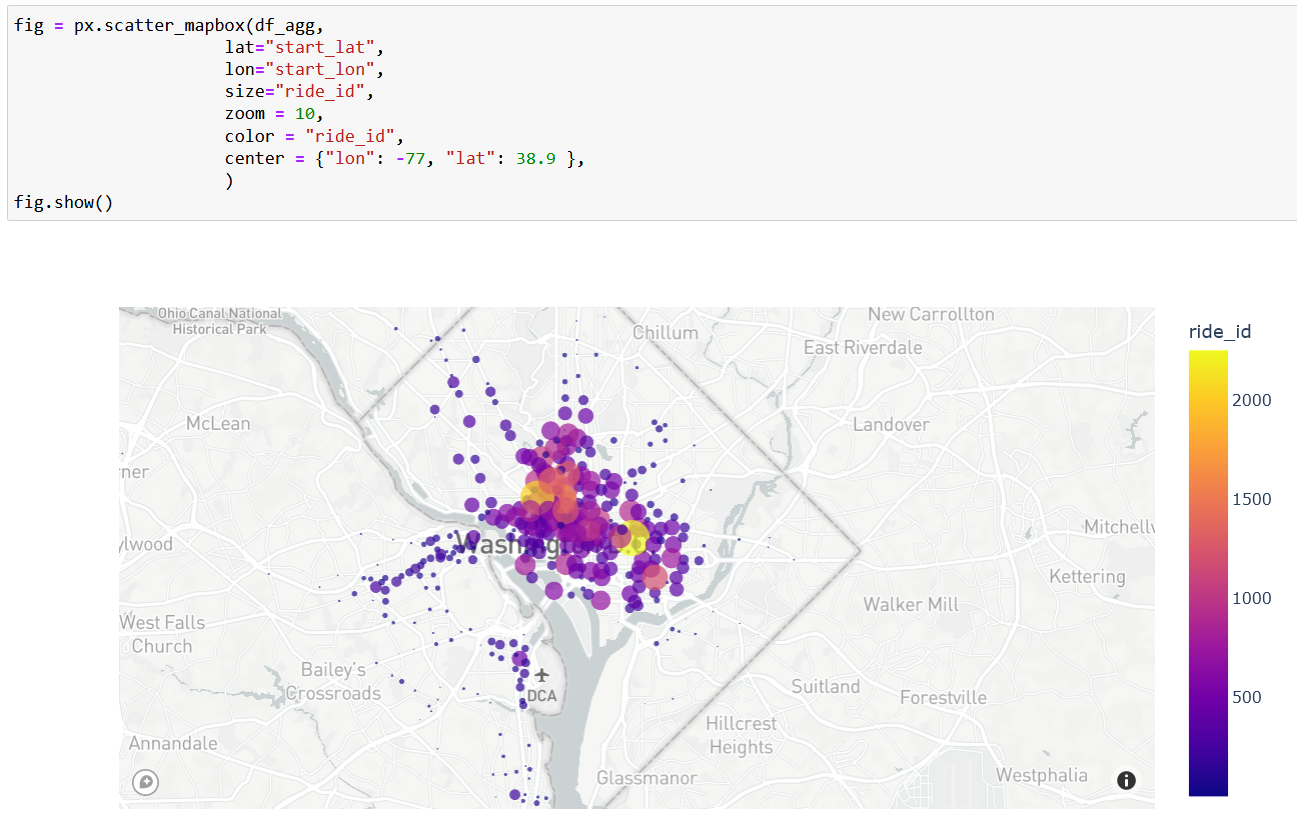

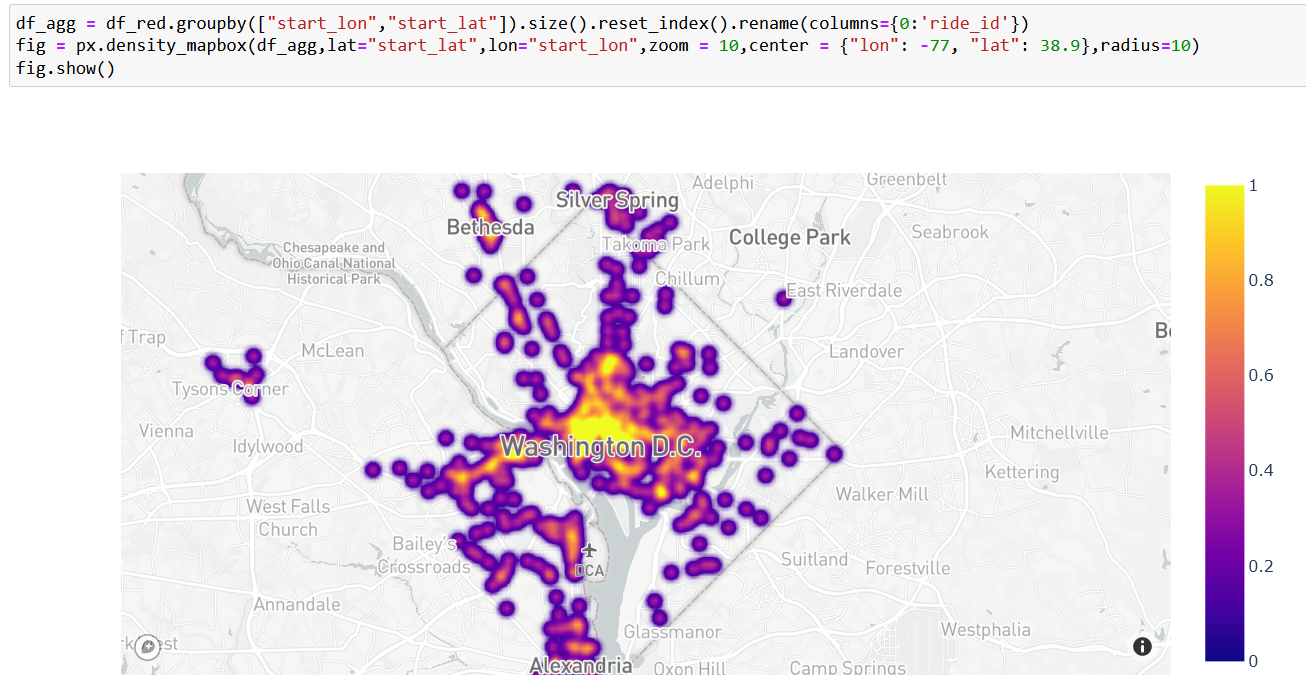